In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad_vec, simpson


%matplotlib widget

![Exercise-18](ex18.png)

## a)

$$\begin{align*}
    \mathrm{LDOS}\Big\vert_{00} &= -\frac{1}{\pi}\mathrm{Im}(\mathbf{G}_{00}(E)) 
    \\
    % \mathbf{G}_{00}(t) &= \frac{i}{2\pi}\int_{-\infty}^\infty dE\ e^{-iEt}\mathbf{G}_{00}(E) 
    \\  \mathbf{G}_{00}(E) &= \left.\frac{1}{E + i\eta - \varepsilon - \Sigma}\right\vert_{\Sigma = \Lambda - i\Gamma/2}
    % \\  &= \frac{1}{E + i\eta - \varepsilon - \Lambda + i\Gamma/2}
    \\  &= \frac{1}{E - \varepsilon - \Lambda + i(\eta + \Gamma/2)} = \frac{(E - \varepsilon - \Lambda) - i(\eta + \Gamma/2)}{(E - \varepsilon - \Lambda)^2 + (\eta + \Gamma/2)^2}
    \\ \mathrm{LDOS}\vert_{00} &=\frac{\eta + \Gamma/2}{\pi\left((E - \varepsilon - \Lambda)^2 + (\eta + \Gamma/2)^2\right)}
\end{align*}$$

## b)
![alt text](ex18-b.png)
![alt text](eq68.png)
![alt text](eq41.png)

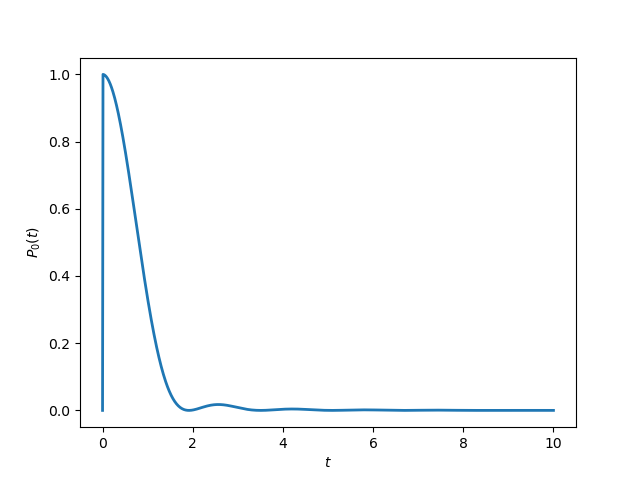

In [49]:
def step_func(t):
    out = t.copy()
    out[t <= 0] = 0
    out[t > 0] = 1
    return out

def wave_func(n, k):
    return 2**0.5 * np.sin(k*(n+1))

def energy(k):
    return -2*np.cos(k)

def Green(t, l=0, m=0, **kwargs):
    '''
    Compute the Greens function matrix element of (l, m) at all times in `t`.
    
    Parameters
    ---
        t : array_like, size (N, 1)
        l : int, row index
        m : int, col index
        
    return 
    '''
    
    
    
    # k = np.linspace(1e-5, np.pi, num=kwargs.get("num_k", 50), ) # let k be defined on the interval (0, pi)
    integrand = lambda k: step_func(t) * wave_func(l, k) * np.exp(-1.j * energy(k) * t) * np.conjugate(wave_func(m, k))/np.pi # size: (N, num_t)
    
    # get the result and error+info from the quad_vec method
    if kwargs.get("full_output", False):
        res, err, info = quad_vec(integrand, a=0, b=np.pi, full_output=True) # integrate over the interval (a,b)
        return -1j*res, err, info
    else:
        res, err = quad_vec(integrand, a=0, b=np.pi, full_output=False) # integrate over the interval (a,b)
        return -1j* res, err


# Define time values used for plot
t = np.linspace(0, 10, num = 1001)[:, None]

# Get the output of the integral. Use full_output to include or exclude the `info` part of the `scipy.integrate.quad_vec`` (default: False)
Greens_res, *err_info = Green(t, 0, 0, full_output=False)

# Start plots
fig, ax = plt.subplots()
ax.plot(t, np.abs(Greens_res)**2, lw=2)

ax.set(xlabel=r"$t$",
       ylabel=r"$P_0(t)$",
    #    yscale="log"
       );